# Question Generation 

## Key Components

### Prompt Structure
- **Clear objective**: Generate 20 relevant questions for specific hashtags
- **Step-by-step reasoning approach** (Chain of Thought):
  1. Read hashtag descriptions
  2. Analyze existing examples
  3. Generate new questions based on understanding

### Reasoning Patterns
- **Context enrichment**: Detailed descriptions of data domains and dimensions
- **Exemplar-based learning**: Providing examples to guide output format
- **Task decomposition**: Breaking the complex generation task into logical steps

### Implementation
```python
from langchain_core.messages import HumanMessage, SystemMessage

# System message contains the CoT-structured prompt
intent_generation1 = llm_classifier.invoke(
    [SystemMessage(content=classifier_generation)]
    + [HumanMessage(content="#Sales")]
)
```

## Insights for Improvement

- **Explicit reasoning**: The prompt encourages understanding before generation
- **Missing verification**: No mechanism to validate the quality of generated questions
- **Extension possibilities**: Could add reflection steps to evaluate outputs
- **Domain knowledge integration**: Leverages specific business intelligence contexts

In [ ]:
! pip install -U langgraph langsmith
! pip install langchain_community
! pip install langchain_openai

In [27]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
from langchain_openai import ChatOpenAI  #  
# Définition de la clé API
os.environ['OPENAI_API_KEY'] = "sk-proj-rPBnsXimJyDjm9m7k8ZxrMdz1Lgs6 nFcLW9rnMorepgfeAZNQQz5FUUwrtmQsA"

# Création du modèle
llm_classifier = ChatOpenAI(
    model="gpt-4o-mini",  #  
    temperature=0
)

# Question Generation 

## Key Components

### Prompt Structure
- **Clear objective**: Generate 20 relevant questions for specific hashtags
- **Step-by-step reasoning approach** (Chain of Thought):
  1. Read hashtag descriptions
  2. Analyze existing examples
  3. Generate new questions based on understanding

### Reasoning Patterns
- **Context enrichment**: Detailed descriptions of data domains and dimensions
- **Exemplar-based learning**: Providing examples to guide output format
- **Task decomposition**: Breaking the complex generation task into logical steps

### Implementation
```python
from langchain_core.messages import HumanMessage, SystemMessage

# System message contains the CoT-structured prompt
intent_generation1 = llm_classifier.invoke(
    [SystemMessage(content=classifier_generation)]
    + [HumanMessage(content="#Sales")]
)
```

## Insights for Improvement

- **Explicit reasoning**: The prompt encourages understanding before generation
- **Missing verification**: No mechanism to validate the quality of generated questions
- **Extension possibilities**: Could add reflection steps to evaluate outputs
- **Domain knowledge integration**: Leverages specific business intelligence contexts

In [29]:
from langchain_core.messages import HumanMessage, SystemMessage

# Intent_generation
question_generation_prompt = """"Your goal is to generate 20 relevant questions for each hashtag (#Sales and #Channel_Dynamics) based on their description and the provided examples.

Follow these steps:

Step 1: Carefully read the hashtag description to understand the objectives, data, and dimensions involved
Step 2: Analyze the examples of questions already associated with this hashtag to grasp the format and context
Step 3: Generate 20 new questions for each hashtag that accurately reflect their description and are inspired by the examples
step 4: Try to generate 5 examples out of the 20 without the word sales and be careful to keep the meaning of the tag description 

Hashtag Description of intent #Sales:
This tag is used when a user asks questions about Sales Performance. Maximizing Sales is the ultimate goal of any commercial production organization, so understanding Sales Performance is very important. The data includes information on Sales in various currencies and "Trade Levels" (e.g., Manufacturer, Wholesaler, Public/pharmacy prices) and is split by dimensions such as Country, Corporation, Anatomical Therapy Class, Disease, Product, Form, Strength, Pack.

Examples of #Sales questions with the word sale :
- How are my sales looking?
- Show me company sales in Germany

Examples of of #Sales questions without the word sale : 

- Which are the top 10 Products?
- What is the current performance of our products in the UK market?


Description of hashtag #Channel_Dynamics:
This tag is used when a user asks questions about any kind of Spend, Marketing Spend, Promoters/detractors, Mentions, etc. The data provides information on how products are marketed and perceived.

Examples of #Channel_Dynamics questions:
- How many mentions is my product getting?
- How positively do consumers view my brand?
- What are my competitors spending on marketing?

Your task is to generate 20 relevant questions for the hastag in input.
"""

# Test classifier
intent_question_generation = llm_classifier.invoke(
    [SystemMessage(content=question_generation_prompt)]
    + [
        HumanMessage(
            content="#Sales"
        )
    ]
)

In [30]:
print(intent_question_generation.content)

1. What is the trend of our product performance in the last quarter?
2. How does our revenue compare across different countries?
3. Which anatomical therapy class is generating the most revenue?
4. What are the top-performing products in the public/pharmacy price segment?
5. How do our sales figures vary by product form and strength?
6. What is the market share of our corporation in the European region?
7. How have sales changed over the past year in the wholesaler channel?
8. Which disease categories are driving the highest sales for our products?
9. What is the average price point for our products in the US market?
10. How do our sales figures compare to those of our main competitors?
11. What are the sales trends for our products in emerging markets?
12. How does the performance of our products differ by pack size?
13. What is the impact of promotional activities on our sales performance?
14. Which countries are showing the highest growth in sales for our products?
15. How do sales 

In [51]:
# Test classifier
intent_question_generation_cd = llm_classifier.invoke(
    [SystemMessage(content=question_generation_prompt)]
    + [
        HumanMessage(
            content="#Channel_Dynamics"
        )
    ]
)

In [52]:
print(intent_question_generation_cd.content)

Here are 20 relevant questions for the hashtag #Channel_Dynamics:

1. What is the current sentiment around my brand in social media discussions?
2. How does our marketing spend compare to industry benchmarks?
3. What are the key factors influencing customer perceptions of our products?
4. How many positive reviews have we received in the last quarter?
5. What channels are driving the most engagement for our marketing campaigns?
6. How frequently are our products mentioned in online forums?
7. What is the average customer rating for our latest product launch?
8. How do our promotional efforts impact customer loyalty?
9. What trends are emerging in consumer feedback about our brand?
10. How does our brand's visibility compare to that of our main competitors?
11. What percentage of our marketing budget is allocated to digital channels?
12. How do customer demographics influence their perception of our products?
13. What are the most common themes in customer complaints about our brand?
14

In [50]:
from typing_extensions import TypedDict
from typing import List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, HTML
import pandas as pd
from rich.console import Console
from rich.table import Table

In [32]:
from typing_extensions import TypedDict
from typing import List

class GraphState(TypedDict):
    """
    Graph state is a dictionary that contains information we want to propagate to, and modify in, each graph node.
    """
    question: str  # User question
    generated_examples: str  # LLM generation of examples  
    intent_answer: str  # LLM Hastag intention  
    nb_question: int  # Number of question generated

# GraphState Type Structure Analysis

## Data Structure Overview

The `GraphState` class implements a custom TypedDict for maintaining state across graph nodes in an agent-based workflow system.

```python
class GraphState(TypedDict):
    """
    Graph state is a dictionary that contains information we want to propagate to, and modify in, each graph node.
    """
    question: str  # User question
    generated_examples: str  # LLM generation of examples  
    intent_answer: str  # LLM Hastag intention  
    nb_question: int  # Number of question generated
```

## Key Elements

 

### Typed Components
- **question**: Stores the original user query (input)
- **generated_examples**: Holds LLM-generated example content (intermediate output)
- **intent_answer**: Captures the hashtag intent classification result (intermediate output)
- **nb_question**: Tracks the quantity of generated questions (metadata/tracking)

 

 

In [36]:
def generation_question(state: GraphState):
    """
    Generation of examples 

    Args:
        state (dict): The current graph state

    Returns:
        dict: Updated state with generation_question
    """
    print("---generation_question---")
    
    # code for calling the LLM
    gen_question = llm_classifier.invoke(
        [SystemMessage(content=question_generation_prompt)]
        + [HumanMessage(content=state["question"])]
    )
    
    # "Important: return the complete updated state, not just the new value.
    return {"generated_examples": gen_question.content}

 

## Key Components

 

### Execution Pattern
- **Streaming Mode**: Uses event streaming for observability
- **Value Monitoring**: Configured to stream state values
- **Process Tracing**: Outputs each step of the execution
- **Conditional Logging**: Special handling for generation_question output

## Chain of Thought Implementation

This code demonstrates a structured reasoning workflow with:

1. **Explicit Process Model**: Defines a concrete processing graph
2. **Sequential Reasoning**: Enforces specific processing order
3. **State Evolution Tracking**: Monitors how information transforms
4. **Observable Execution**: Provides visibility into the reasoning process

## Implementation Notes

- This represents a minimal implementation with just one processing node
 

 

In this specific example, the graph will:
1. Start with the input question "#Sales"
2. Process it through the `generation_question` function
3. Use the LLM to generate example questions for the Sales intent
4. Stream and output the results
5. Terminate the workflow

In [37]:
# Graph definition
graph_builder = StateGraph(GraphState)
graph_builder.add_node("generation_question", generation_question)
graph_builder.add_edge(START, "generation_question")
graph_builder.add_edge("generation_question", END)
graph = graph_builder.compile()

# Initialization of the state with all required keys.
inputs = {
    "question": "#Sales",
    "generation_question": "",  # Valeur vide initiale
    "intent_answer": "",        # Valeur vide initiale
    "nb_question": 20            # Valeur initiale
}

# Graph execution 
print("Démarrage de l'exécution du graphe...")
for event in graph.stream(inputs, stream_mode="values"):
    print(f"Étape du graphe: {event}")
    
    # If you want to access specific values.
    if "generation_question" in event and event["generation_question"]:
        print(f"Génération de questions: {event['generation_question']}")

Démarrage de l'exécution du graphe...
Étape du graphe: {'question': '#Sales', 'intent_answer': '', 'nb_question': 20}
---generation_question---
Étape du graphe: {'question': '#Sales', 'generated_examples': '1. What is the trend of our product performance over the last quarter?\n2. How does our revenue compare across different countries?\n3. Which anatomical therapy class is generating the most revenue?\n4. What are the top-performing products in the public/pharmacy price segment?\n5. How does our market share vary by product form?\n6. What is the average price strength of our products in the European market?\n7. Which corporation has the highest sales volume in the last year?\n8. How do sales figures differ between wholesalers and manufacturers?\n9. What is the sales performance of our products in the oncology therapy class?\n10. How are our sales distributed across different pack sizes?\n11. What are the sales trends for our products in the Asia-Pacific region?\n12. Which disease cate

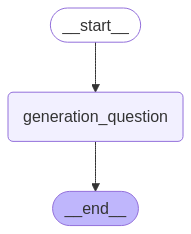

In [38]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [39]:
from rich.console import Console
from rich.table import Table

def display_rich_table(results):
    console = Console(width=150)  # Increase the console width.
    table = Table(title="Résultats de l'exécution du graphe LangGraph")
    
    # Add columns with custom widths
    table.add_column("question", justify="left", style="cyan", width=20)
    table.add_column("intent_answer", justify="left", style="green", width=20)
    table.add_column("nb_question", justify="right", style="blue", width=12)
    table.add_column("generated_examples", justify="left", style="magenta", width=80)
    
    # Add the lines
    for result in results:
        # Do not truncate the values.
        row_values = [
            str(result.get("question", "")),
            str(result.get("intent_answer", "")),
            str(result.get("nb_question", "")),
            str(result.get("generated_examples", ""))
        ]
        table.add_row(*row_values)
    
    console.print(table)

In [41]:
import pandas as pd
from IPython.display import display

def display_pandas_table(results):
    pd.set_option('display.max_colwidth', None)  # Do not limit the width of columns
    pd.set_option('display.width', 1000)  # Total display width
    
    df = pd.DataFrame(results)
    
    # Display the table without truncating the columns.
    styled_df = df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap',
        'font-size': '10pt',
        'max-width': '800px'
    })
    
    display(styled_df)

In [42]:
def create_html_table(results):
    html = """
    <style>
    .langgraph-table {
      border-collapse: collapse;
      width: 100%;
      margin: 25px 0;
      font-size: 0.9em;
      font-family: sans-serif;
      box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
    }
    .langgraph-table thead tr {
      background-color: #2c3e50;
      color: white;
      text-align: left;
    }
    .langgraph-table th,
    .langgraph-table td {
      padding: 12px 15px;
      max-width: 300px;
      overflow: hidden;
      text-overflow: ellipsis;
    }
    .langgraph-table td {
      color: black;
    }
    .langgraph-table tbody tr {
      border-bottom: 1px solid #dddddd;
    }
    .langgraph-table tbody tr:nth-of-type(even) {
      background-color: #f3f3f3;
    }
    .langgraph-table tbody tr:last-of-type {
      border-bottom: 2px solid #2c3e50;
    }
    </style>
    <table class="langgraph-table">
      <thead>
        <tr>
    """
    
    # Add the column headers.
    for key in results[0].keys():
        html += f"<th>{key}</th>"
    
    html += """
        </tr>
      </thead>
      <tbody>
    """
    
    # add the lines 
    for result in results:
        html += "<tr>"
        for key, value in result.items():
            # Limit the size 
            display_value = str(value)
            if key == "generated_examples":
                # For this column, we keep the line breaks
                display_value = display_value.replace("\n", "<br>")
            elif len(display_value) > 100:
                display_value = display_value[:97] + "..."
            
            # Force the text color to black with an inline style
            html += f"<td style='color: black;'>{display_value}</td>"
        html += "</tr>"
    
    html += """
      </tbody>
    </table>
    """
    
    return html

In [43]:
# After the defintion and execution of the graph 
results = []
for event in graph.stream(inputs, stream_mode="values"):
    print(f"Étape du graphe: {event}")
    results.append(event.copy())
    
    # Accès aux données générées si nécessaire
    if "generated_examples" in event and event["generated_examples"]:
        examples = event["generated_examples"]
        # Faire quelque chose avec les exemples


Étape du graphe: {'question': '#Sales', 'intent_answer': '', 'nb_question': 20}
---generation_question---
Étape du graphe: {'question': '#Sales', 'generated_examples': '1. What is the trend of our product performance over the last quarter?\n2. How does our revenue compare across different countries?\n3. Which anatomical therapy class is generating the most revenue?\n4. What are the top-performing products in the public pricing segment?\n5. How do our sales figures vary by product form and strength?\n6. What is the market share of our corporation in the European region?\n7. How do sales figures differ between wholesalers and manufacturers?\n8. What is the average price point for our products in the pharmacy sector?\n9. Which disease category is driving the highest sales for our company?\n10. How have our sales changed in the last year in the US market?\n11. What are the sales projections for our new product launch?\n12. How do our sales compare to those of our main competitors?\n13. Wha

In [44]:
if results:
    display_rich_table([results[-1]])

                                                  Résultats de l'exécution du graphe LangGraph                                                   
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ question             ┃ intent_answer        ┃  nb_question ┃ generated_examples                                                               ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ #Sales               │                      │           20 │ 1. What is the trend of our product performance over the last quarter?           │
│                      │                      │              │ 2. How does our revenue compare across different countries?                      │
│                      │                      │              │ 3. Which anatomical therapy class is generating the most revenue?                │
│                      │                      │              │ 4. What are the top-performing products in the public pricing segment?           │
│                      │                      │              │ 5. How do our sales figures vary by product form and strength?                   │
│                      │                      │              │ 6. What is the market share of our corporation in the European region?           │
│                      │                      │              │ 7. How do sales figures differ between wholesalers and manufacturers?            │
│                      │                      │              │ 8. What is the average price point for our products in the pharmacy sector?      │
│                      │                      │              │ 9. Which disease category is driving the highest sales for our company?          │
│                      │                      │              │ 10. How have our sales changed in the last year in the US market?                │
│                      │                      │              │ 11. What are the sales projections for our new product launch?                   │
│                      │                      │              │ 12. How do our sales compare to those of our main competitors?                   │
│                      │                      │              │ 13. What is the impact of promotional activities on our sales performance?       │
│                      │                      │              │ 14. Which country has shown the most growth in our sales figures?                │
│                      │                      │              │ 15. How do seasonal trends affect our sales across different regions?            │
│                      │                      │              │ 16. What is the breakdown of our sales by product strength?                      │
│                      │                      │              │ 17. How do our sales in the online market compare to traditional retail?         │
│                      │                      │              │ 18. What factors are influencing the decline in sales for certain products?      │
│                      │                      │              │ 19. How do customer demographics affect our sales performance?                   │
│                      │                      │              │ 20. What strategies can we implement to improve sales in underperforming         │
│                      │                      │              │ regions?                                                                         │
└──────────────────────┴──────────────────────┴──────────────┴──────────────────────────────────────────────────────────────────────────────────┘

In [48]:
def print_text_table(results):
    """
    Fonction qui affiche un tableau en texte brut dans le terminal
    sans dépendre du formatage HTML ou des couleurs.
    """
    if not results:
        print("Aucun résultat à afficher")
        return
    
    result = results[-1]  # take the last result
    
    print("\n" + "=" * 80)
    print(f"QUESTION: {result.get('question', '')}")
    print("-" * 80)
    
    if 'intent_answer' in result and result['intent_answer']:
        print(f"INTENT: {result['intent_answer']}")
        print("-" * 80)
    
    if 'nb_question' in result:
        print(f"NUMBER OF QUESTIONS: {result['nb_question']}")
        print("-" * 80)
    
    if 'generated_examples' in result and result['generated_examples']:
        print("GENERATED EXAMPLES:")
        print(result['generated_examples'])
    
    print("=" * 80 + "\n")

In [49]:
# Collect the state 
results = []
for event in graph.stream(inputs, stream_mode="values"):
    results.append(event.copy())

# Display the result in text format 
if results:
    print_text_table(results)

---generation_question---

QUESTION: #Sales
--------------------------------------------------------------------------------
NUMBER OF QUESTIONS: 20
--------------------------------------------------------------------------------
GENERATED EXAMPLES:
1. What is the trend of our product performance over the last quarter?
2. How does our revenue compare across different countries?
3. Which anatomical therapy class is generating the most revenue?
4. What are the top-performing products in the public/pharmacy price segment?
5. How do our sales figures vary by product form and strength?
6. What is the market share of our corporation in the European region?
7. How do sales figures differ between wholesalers and manufacturers?
8. What is the average price point for our products in the US market?
9. Which disease category is driving the highest sales for our company?
10. How have our sales figures changed year-over-year in the UK?
11. What are the sales trends for our products in emerging marke